loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
[image id: 139] person 0 bbox: [412.80, 157.61, 465.85, 295.62]
[image id: 139] person 0 keypoints: [[427, 170], [429, 169], [0, 0], [434, 168], [0, 0], [441, 177], [446, 177], [437, 200], [430, 206], [430, 220], [420, 215], [445, 226], [452, 223], [447, 260], [454, 257], [455, 290], [459, 286]]
[image id: 139] person 0 keypoints visible: [1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[image id: 139] person 1 bbox: [384.43, 172.21, 399.55, 207.95]
[image id: 139] person 1 keypoints: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[image id: 139] person 1 keypoints visible: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[image id: 139] image path: ./data/coco2017/val2017/000000000139.jpg
[image id: 285] image path: ./data/coco2017/val2017/000000000285.jpg
[image id: 632] image path: ./data/coco2017/val2017/0

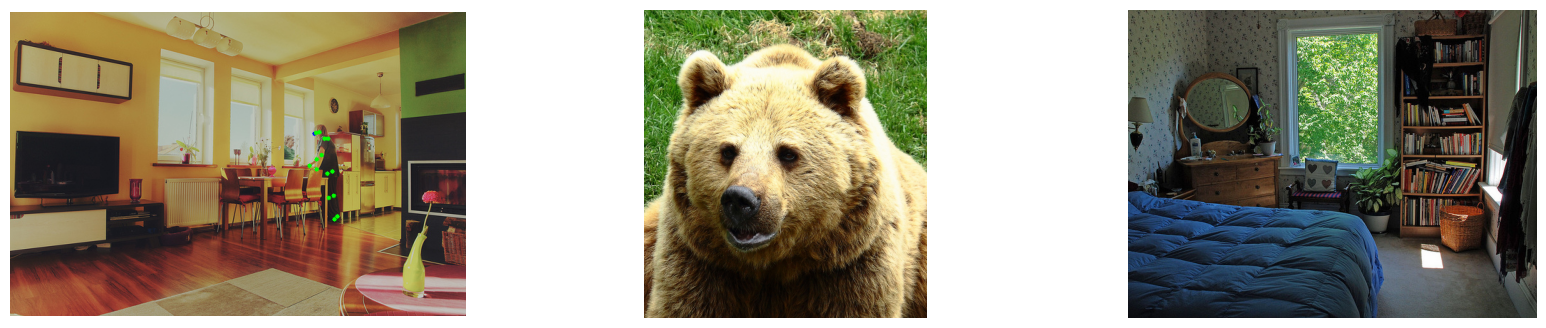

In [36]:
import numpy as np
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

json_path = "./data/coco2017/annotations/person_keypoints_val2017.json"
coco = COCO(json_path)
img_ids = list(sorted(coco.imgs.keys()))

def draw_keypoints(keypoints_list, values_list):
    plt_img = img.copy()
    for key, val in zip(keypoints_list, values_list):
        for i, (x, y) in enumerate(key):
            if val[i] == 2:
                plt_img = cv2.circle(plt_img, (x, y), 3, (0, 255, 0), -1)
            elif val[i] == 1:
                plt_img = cv2.circle(plt_img, (x, y), 3, (0, 0, 255), -1)
    return plt_img

plt.figure(figsize=(20, 4))

# 遍历前3张图片中的人体关键点信息(注意，并不是每张图片里都有人体信息)
for img_id in img_ids[:3]:
    idx = 0
    img_info = coco.loadImgs(img_id)[0]
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)
    keypoints_list = []
    values_list = []
    for ann in anns:
        xmin, ymin, w, h = ann['bbox']
        # 打印人体bbox信息
        print(f"[image id: {img_id}] person {idx} bbox: [{xmin:.2f}, {ymin:.2f}, {xmin + w:.2f}, {ymin + h:.2f}]")
        keypoints_info = np.array(ann["keypoints"]).reshape([-1, 3])
        visible = keypoints_info[:, 2]
        keypoints = keypoints_info[:, :2]
        keypoints_list.append(keypoints.tolist())
        values_list.append(visible.tolist())
        # 打印关键点信息以及可见度信息
        print(f"[image id: {img_id}] person {idx} keypoints: {keypoints.tolist()}")
        print(f"[image id: {img_id}] person {idx} keypoints visible: {visible.tolist()}")
        idx += 1
    # 读取图片并绘制关键点
    img_path = f"./data/coco2017/val2017/{img_info['file_name']}"
    print(f"[image id: {img_id}] image path: {img_path}")
    img = plt.imread(img_path)
    plt_img = draw_keypoints(keypoints_list,values_list)
    plt.subplot(1, 3, img_ids.index(img_id) + 1)
    plt.imshow(plt_img)
    plt.axis("off")

plt.show()
    
    
